# Importing Libraries

In [313]:
import numpy as np                                       #for numerical data
import pandas as pd                                      #for Load the dataset file
import matplotlib.pyplot as plt                          #used for Visualizations
import seaborn as sb                                     #used for Visualizations
from sklearn.preprocessing import LabelEncoder           #for converting catgorical data into numerical data
from sklearn.preprocessing import StandardScaler         #used for Standarizations
from sklearn.model_selection import train_test_split     #used for splitting the data into train and test
from sklearn.naive_bayes import  GaussianNB              #for GaussianNB used for classification
from sklearn.svm import SVC                              #for SVC used for classification    
from sklearn.tree import DecisionTreeClassifier          #for DecisionTreeClassifier used for classification          
from sklearn.linear_model import LogisticRegression      #for LogisticRegression used for classification    
from sklearn.neighbors import KNeighborsClassifier       #for KNeighborsClassifier used for classification     
from sklearn.ensemble import AdaBoostClassifier          #for AdaBoostClassifier used for classification   
from sklearn.ensemble import GradientBoostingClassifier  #for GradientBoostingClassifier used for classification 
from sklearn.ensemble import StackingClassifier          #for StackingClassifier used for classification 
from sklearn.metrics import accuracy_score,f1_score      #finding the score of model Evaluations
from sklearn.metrics import recall_score,precision_score  #finding the score of model Evaluations
from sklearn.metrics import confusion_matrix,classification_report  #finding the score of model Evaluations  
from sklearn.metrics import roc_auc_score                #for calculation the score of ROC and AUC
from sklearn.metrics import roc_curve                    # for finding the curve of ROC
import warnings                                          #for removing warnings
warnings.filterwarnings("ignore")


# Read Dataset_files

In [314]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [315]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [316]:
train.shape  #Total No.of rows and columns

(891, 12)

In [317]:
train.columns #Columns Names

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [318]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [319]:
test.shape  #Total No.of rows and columns

(418, 11)

In [320]:
test.columns #Columns Names

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Information about Dataframe.

In [321]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [322]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [323]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

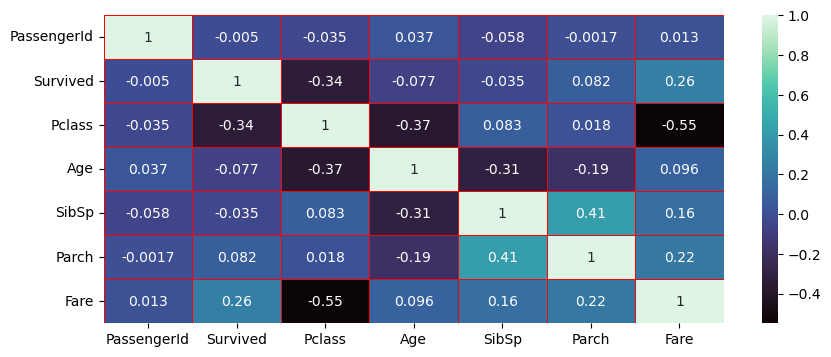

In [324]:
plt.figure(figsize=(10,4))
sb.heatmap(train.corr(),annot=True,linecolor='r',linewidths=.6,cmap='mako')

Conclusion:- Pclass have to be excluded in our analysis beacauses they corrleate with the Fare variable.

# Exploarity Data Analysis

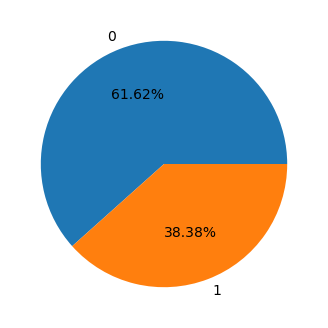

In [325]:
plt.figure(figsize=(10,4))
a=train['Survived'].value_counts()
b=train['Survived'].unique()
plt.pie(a,labels=b,autopct='%.2f%%');


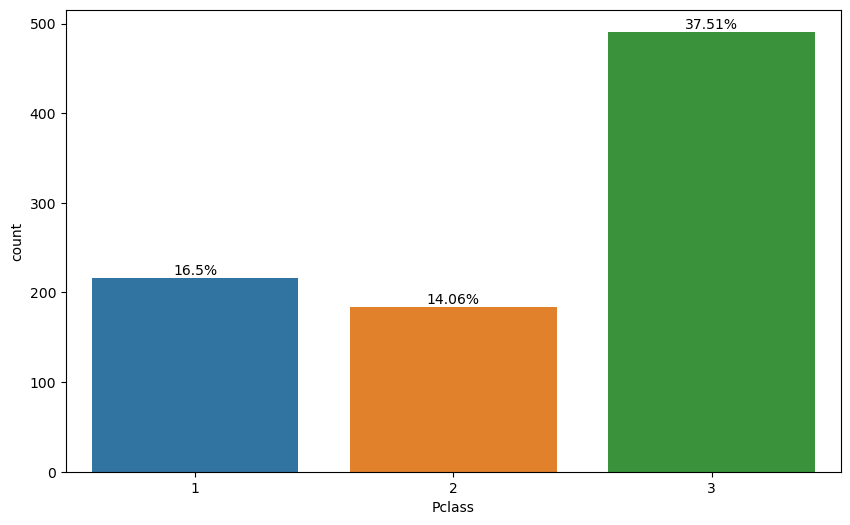

In [326]:
fig, ax = plt.subplots(figsize= (10, 6))
ax = sb.countplot(x = train["Pclass"])
for bar in ax.patches:                                               
    percentage = f"{round((bar.get_height() /len(df))*100, 2)}%"      
                                                                    
    x = bar.get_x() + bar.get_width() /2                            
    y = bar.get_height()                                          
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )    
                                                                    
plt.show()

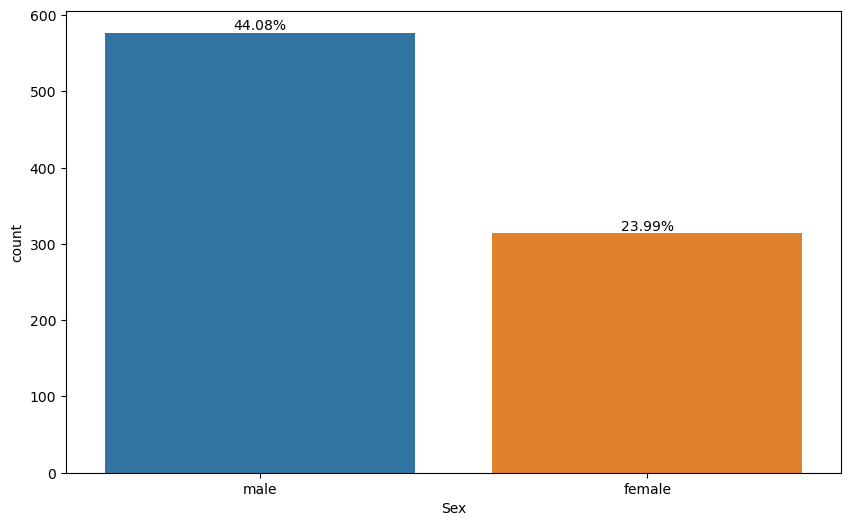

In [327]:
fig, ax = plt.subplots(figsize= (10, 6))
ax = sb.countplot(x = train["Sex"])
for bar in ax.patches:                                               
    percentage = f"{round((bar.get_height() /len(df))*100, 2)}%"      
                                                                    
    x = bar.get_x() + bar.get_width() /2                            
    y = bar.get_height()                                          
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )    
                                                                    
plt.show()

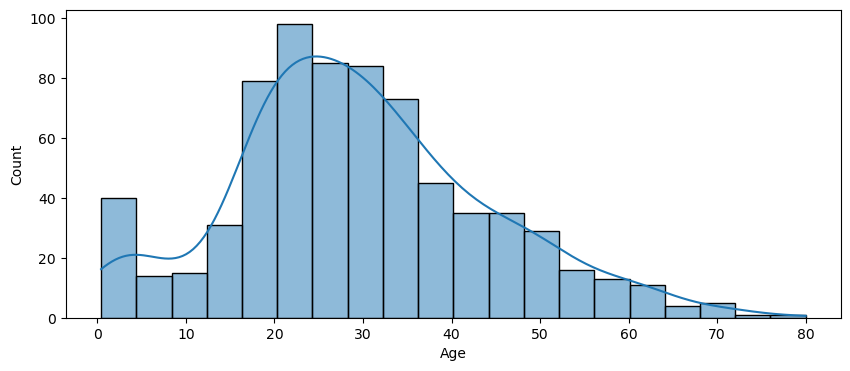

In [328]:
plt.figure(figsize=(10,4))
sb.histplot(train['Age'],kde=True);

The highest Age group people's is between 20-30.

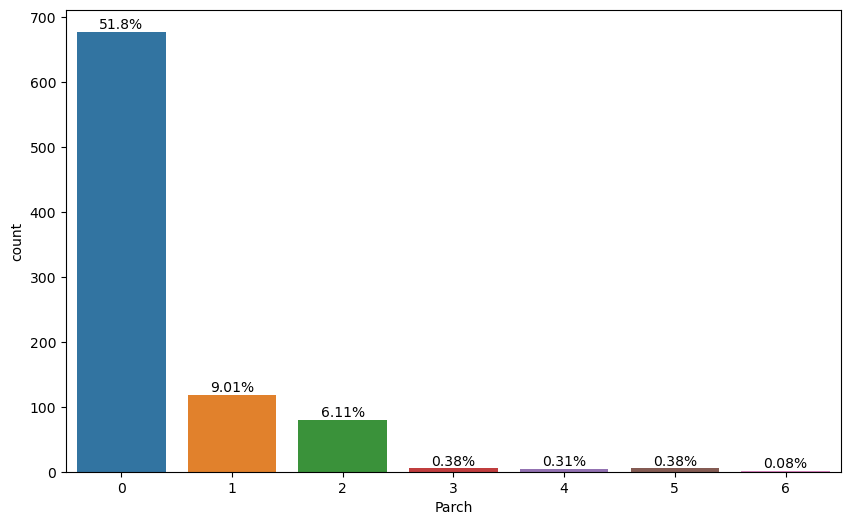

In [329]:
fig, ax = plt.subplots(figsize= (10, 6))
ax = sb.countplot(x = train["Parch"])
for bar in ax.patches:                                               
    percentage = f"{round((bar.get_height() /len(df))*100, 2)}%"      
                                                                    
    x = bar.get_x() + bar.get_width() /2                            
    y = bar.get_height()                                          
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )    
                                                                    
plt.show()

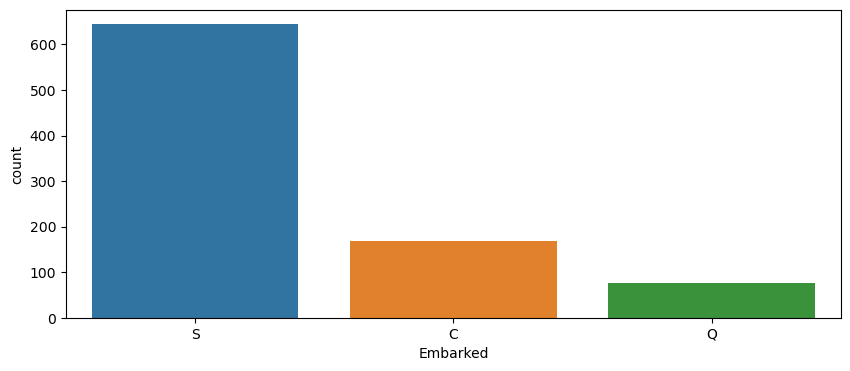

In [330]:
plt.figure(figsize=(10,4))
sb.countplot(train['Embarked']);

In [331]:
fare=pd.pivot_table(data=train,index='Pclass',values='Fare')
fare

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


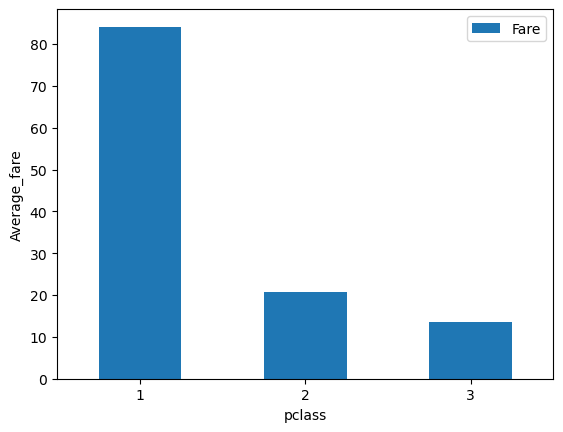

In [332]:
fare.plot(kind='bar')
plt.xlabel('pclass')
plt.ylabel('Average_fare')
plt.xticks(rotation=0);

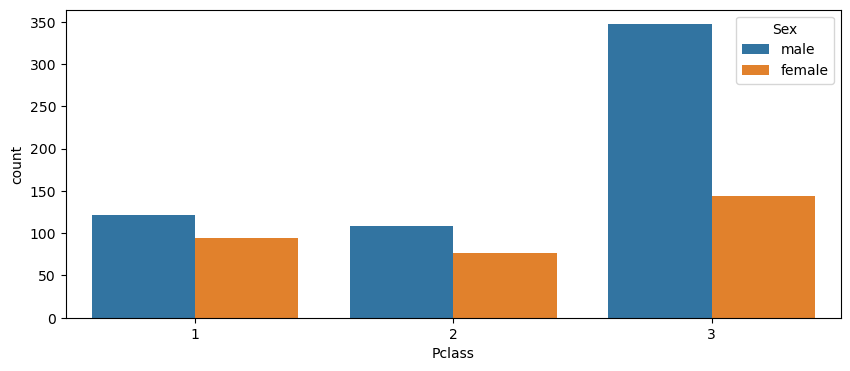

In [333]:
plt.figure(figsize=(10,4))
sb.countplot(train['Pclass'],hue=train['Sex']);

In [334]:
fare_sum=pd.pivot_table(data=train,index='Pclass',values='Fare',aggfunc='sum')
fare_sum

,Fare
Pclass,
1,18177.4125
2,3801.8417
3,6714.6951


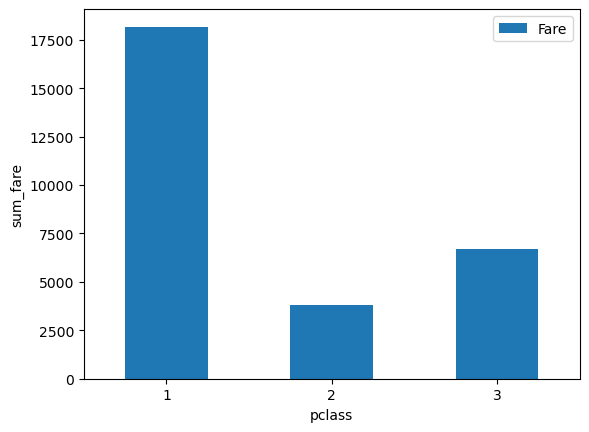

In [335]:
fare_sum.plot(kind='bar')
plt.xlabel('pclass')
plt.ylabel('sum_fare')
plt.xticks(rotation=0);

# Concating the Train and Test Dataset.

In [336]:
df=pd.concat([train,test])
df.reset_index()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Finding Null Values

In [337]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [338]:
df['Survived']=df['Survived'].fillna(df['Survived'].mode()[0])
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Fare']=df['Fare'].fillna(df['Fare'].mean())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [339]:
df.drop(columns='Cabin',axis=1,inplace=True) #droped the col Cabin

In [340]:
df.drop(columns=['Name','Ticket'],axis=1,inplace=True) # dropping unecssary cols

# Data Preprocessing

# Label Encoding()

In [341]:
from sklearn.preprocessing import LabelEncoder
a=LabelEncoder()
df['Sex']=a.fit_transform(df['Sex'])
df['Embarked']=a.fit_transform(df['Embarked'])

In [342]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,7.2500,2
1,2,1.0,1,0,38.0,1,0,71.2833,0
2,3,1.0,3,0,26.0,0,0,7.9250,2
3,4,1.0,1,0,35.0,1,0,53.1000,2
4,5,0.0,3,1,35.0,0,0,8.0500,2


# Feature Scaling

In [343]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
final_df=pd.DataFrame(scale.fit_transform(df),columns=df.columns)
final_df


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,-1.730728,-0.594703,0.841916,0.743497,-0.611972,0.481288,-0.445000,-0.503595,0.622279
1,-1.728082,1.681513,-1.546098,-1.344995,0.630431,0.481288,-0.445000,0.734503,-1.834926
2,-1.725435,1.681513,0.841916,-1.344995,-0.301371,-0.479087,-0.445000,-0.490544,0.622279
3,-1.722789,1.681513,-1.546098,-1.344995,0.397481,0.481288,-0.445000,0.382925,0.622279
4,-1.720143,-0.594703,0.841916,0.743497,0.397481,-0.479087,-0.445000,-0.488127,0.622279
...,...,...,...,...,...,...,...,...,...
1304,1.720143,-0.594703,0.841916,0.743497,0.000000,-0.479087,-0.445000,-0.488127,0.622279
1305,1.722789,-0.594703,-1.546098,-1.344995,0.708081,-0.479087,-0.445000,1.461829,-1.834926
1306,1.725435,-0.594703,0.841916,0.743497,0.669256,-0.479087,-0.445000,-0.503595,0.622279
1307,1.728082,-0.594703,0.841916,0.743497,0.000000,-0.479087,-0.445000,-0.488127,0.622279


# Train_Test_Split

In [344]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['PassengerId','Survived'],axis=1)
y=df['Survived']

In [345]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

# Model Buliding

In [346]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
model=LR.fit(x_train,y_train)
model.score(x_train,y_train)

0.7908309455587392

In [347]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier

# Importing the models of Cross-Validation

In [348]:
from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold,RepeatedStratifiedKFold  #for finding the scores of cross-validations

In [349]:
model_LOG=LogisticRegression()
model_GAU=GaussianNB()
model_SVM=SVC()
model_KNN=KNeighborsClassifier()
model_DT=DecisionTreeClassifier()
model_ADA=AdaBoostClassifier()
model_GRA=GradientBoostingClassifier()
model_RAM=RandomForestClassifier()

# Checking the accuracy for each model to find the best model for further.

In [350]:
model=[model_LOG,model_GAU,model_SVM,model_KNN,model_DT,model_ADA,model_GRA,model_RAM]
L,G,S,K,D,A,GR,RA=[],[],[],[],[],[],[],[]
splits=[1,3,5,7,9,11]
for i in splits:
    cv=KFold(n_splits=8,shuffle=True,random_state=42)
    for j in model:
        score=cross_val_score(j,x_train,y_train,cv=cv,n_jobs=-1)
        if j==model_LOG:
            L.append(score.mean())
        elif j==model_GAU:
            G.append(score.mean())
        elif j==model_SVM:
            S.append(score.mean())
        elif j==model_KNN:
            K.append(score.mean())
        elif j==model_DT:
            D.append(score.mean())
        elif j==model_ADA:
            A.append(score.mean())
        elif j==model_GRA:
            GR.append(score.mean())
        elif j==model_RAM:
            RA.append(score.mean())           

In [351]:
pd.DataFrame({'n:splits':splits,'LogisticRegression':L,'GaussianNB':G,'SVC':S,'KNeighborsClassifier':K,'DecisionTreeClassifier':D,'AdaBoostClassifier':A,'GradientBoostingClassifier':GR,'Ramdom_Forest':RA})


,n:splits,LogisticRegression,GaussianNB,SVC,KNeighborsClassifier,DecisionTreeClassifier,AdaBoostClassifier,GradientBoostingClassifier,Ramdom_Forest
0,1,0.785981,0.757318,0.741075,0.723884,0.751629,0.769759,0.775484,0.765018
1,3,0.785981,0.757318,0.741075,0.723884,0.745897,0.769759,0.775484,0.766926
2,5,0.785981,0.757318,0.741075,0.723884,0.758324,0.769759,0.775484,0.769781
3,7,0.785981,0.757318,0.741075,0.723884,0.743049,0.769759,0.775484,0.756430
4,9,0.785981,0.757318,0.741075,0.723884,0.743042,0.769759,0.775484,0.769781
5,11,0.785981,0.757318,0.741075,0.723884,0.743981,0.769759,0.775484,0.768827


The LogisticRegression is getting high accuracy(0.785981) as compare to other models

# Predicting the values.

In [352]:
y_pred=LR.predict(x_test)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0.

# Model Evaluations.

In [353]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score,recall_score,classification_report

In [354]:
LR.score(x_train,y_train)  #Training accuracy

0.7908309455587392

In [355]:
LR.score(x_test,y_test) #Testing accuracy

0.767175572519084

In [356]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85       189
         1.0       0.64      0.37      0.47        73

    accuracy                           0.77       262
   macro avg       0.72      0.65      0.66       262
weighted avg       0.75      0.77      0.74       262



# Evaluate ROC and AUC scores.

In [357]:
from sklearn.metrics import roc_auc_score
print('roc_auc_score',roc_auc_score(y_test,LR.predict_proba(x_test)[:,1]))

roc_auc_score 0.7862941219105603


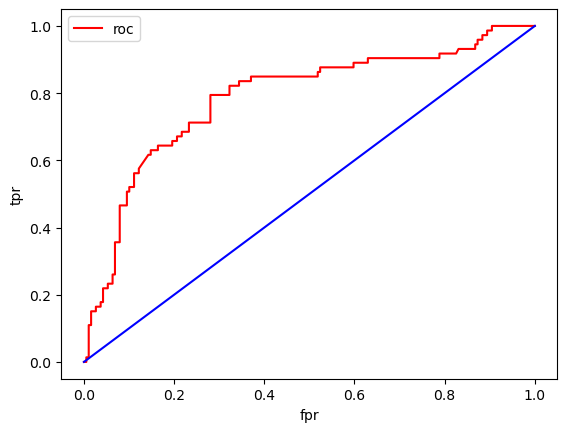

In [358]:
from sklearn.metrics import roc_curve,auc
a=LR.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,a)
plt.plot(fpr,tpr,color='red',label='roc')
plt.plot([0,1],[0,1],color='blue',linestyle='-')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend()